# Heart disease Analysis Using EDA Python

## Extensive Analysis + Visualization with Python

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as st
%matplotlib inline

sns.set(style="whitegrid")

In [2]:
# ignore warnings

import warnings
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv(r'C:\Users\Mukesh\OneDrive\Desktop\Tanmay Folder\Projects\Heart Disease Analysis using EDA Python\heart.csv')

In [8]:
# print the shape
print('The shape of the dataset : ', df.shape)

The shape of the dataset :  (1025, 14)


In [9]:
# preview dataset
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [10]:
# summary of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [11]:
df.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [12]:
# statistical properties of dataset
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [13]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [14]:
df['target'].nunique()

2

In [15]:
df['target'].unique()

array([0, 1], dtype=int64)

In [16]:
df['target'].value_counts()

target
1    526
0    499
Name: count, dtype: int64

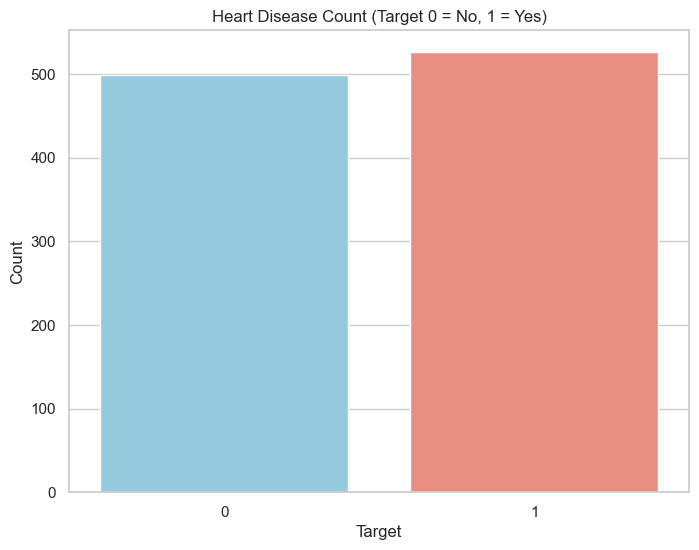

In [24]:
# Plot with string keys
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", data=df, palette={'0': "skyblue", '1': "salmon"})

plt.title("Heart Disease Count (Target 0 = No, 1 = Yes)")
plt.xlabel("Target")
plt.ylabel("Count")
plt.show()


In [25]:
df.groupby('sex')['target'].value_counts()

sex  target
0    1         226
     0          86
1    0         413
     1         300
Name: count, dtype: int64

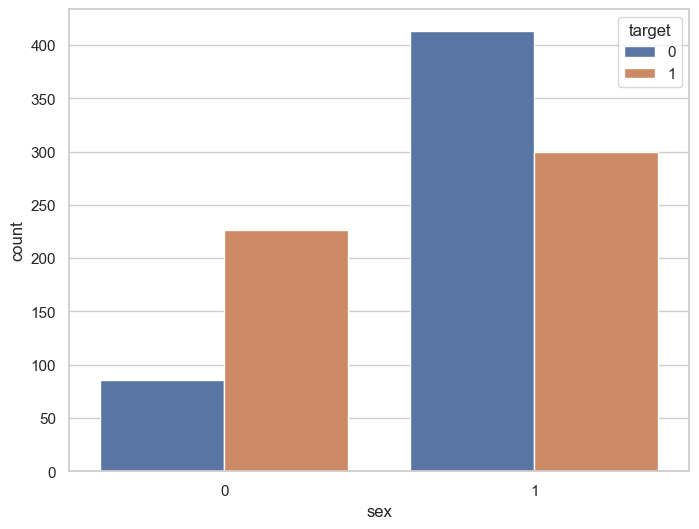

In [26]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="sex", hue="target", data=df)
plt.show()

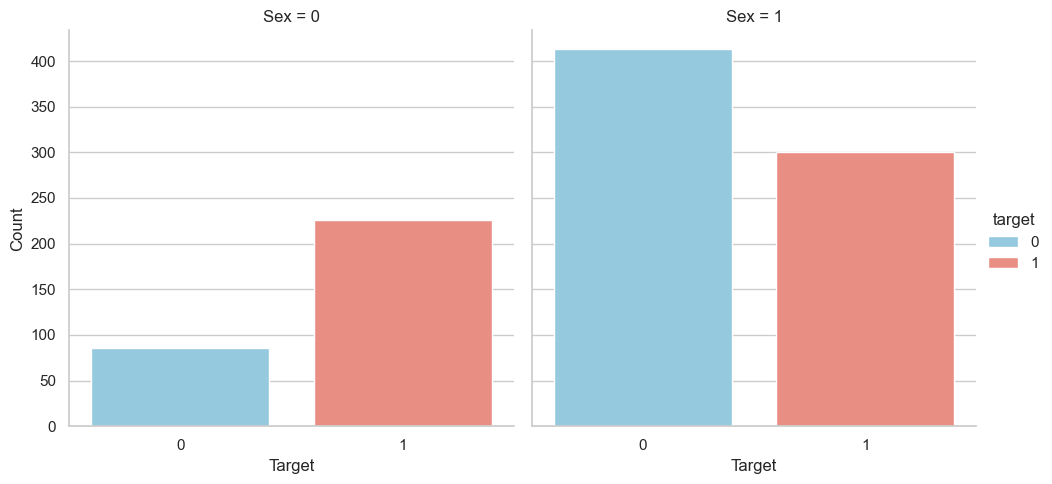

In [32]:
# Convert target to int if it's not already
df["target"] = df["target"].astype(int)

# Use catplot with hue and color palette
ax = sns.catplot(
    x="target", 
    col="sex", 
    data=df, 
    kind="count", 
    hue="target", 
    palette={0: "skyblue", 1: "salmon"},
    height=5, 
    aspect=1
)

# Set titles and labels
ax.set_titles("Sex = {col_name}")
ax.set_axis_labels("Target", "Count")
plt.show()


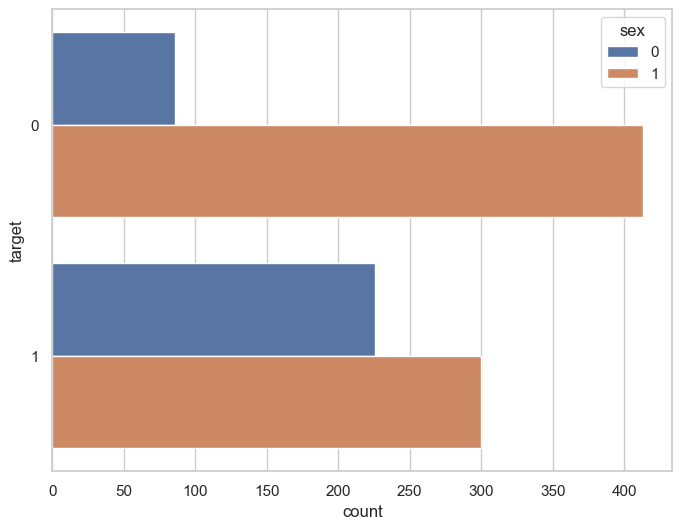

In [33]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(y="target", hue="sex", data=df)
plt.show()

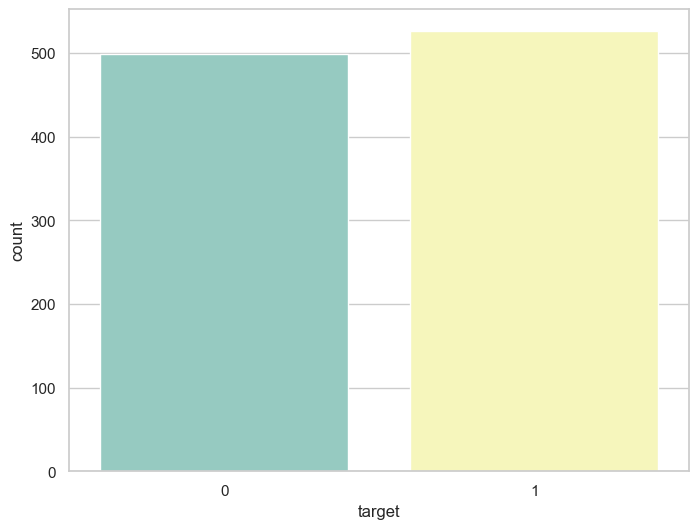

In [34]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", data=df, palette="Set3")
plt.show()

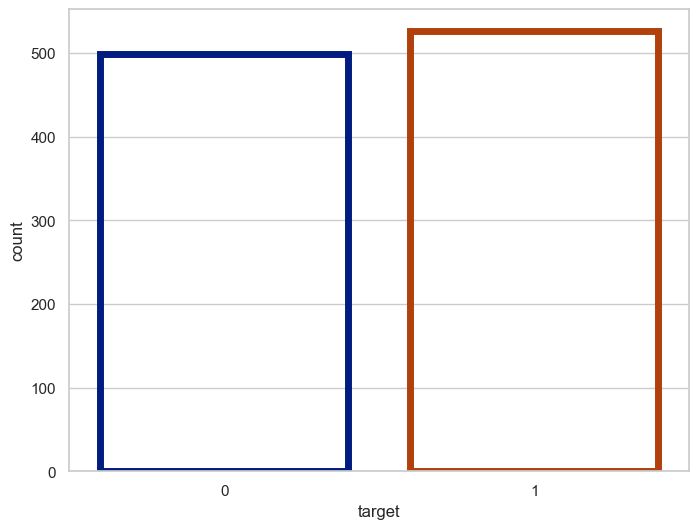

In [35]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", data=df, facecolor=(0, 0, 0, 0), linewidth=5, edgecolor=sns.color_palette("dark", 3))
plt.show()

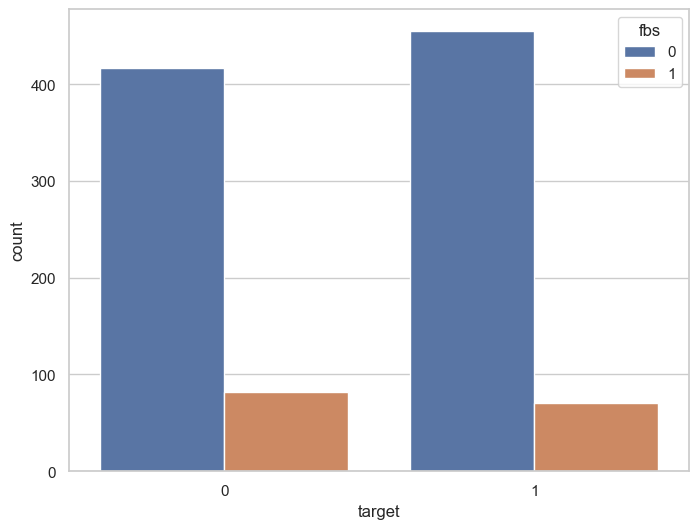

In [36]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", hue="fbs", data=df)
plt.show()

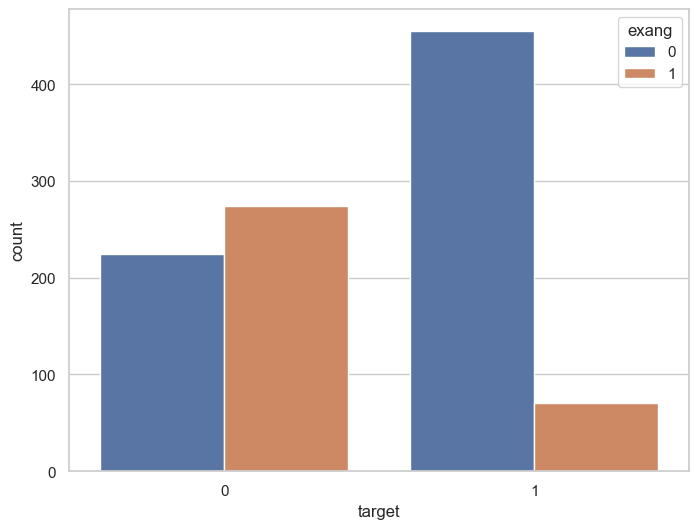

In [37]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="target", hue="exang", data=df)
plt.show()

In [39]:
correlation = df.corr()

In [40]:
correlation['target'].sort_values(ascending=False)

target      1.000000
cp          0.434854
thalach     0.422895
slope       0.345512
restecg     0.134468
fbs        -0.041164
chol       -0.099966
trestbps   -0.138772
age        -0.229324
sex        -0.279501
thal       -0.337838
ca         -0.382085
exang      -0.438029
oldpeak    -0.438441
Name: target, dtype: float64

In [41]:
df['cp'].nunique()

4

In [42]:
df['cp'].value_counts()

cp
0    497
2    284
1    167
3     77
Name: count, dtype: int64

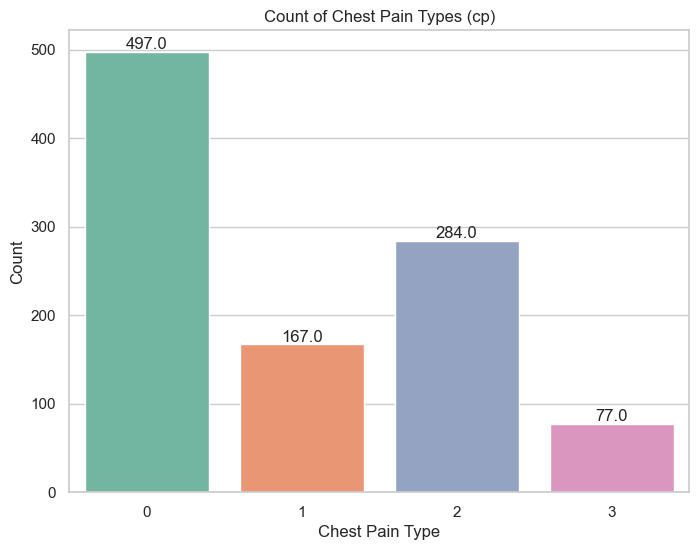

In [45]:
f, ax = plt.subplots(figsize=(8, 6))

# Set a color palette with as many colors as cp categories
ax = sns.countplot(x="cp", data=df, palette="Set2")  # or try 'husl', 'coolwarm', 'pastel'

# Add labels and title
ax.set_title("Count of Chest Pain Types (cp)")
ax.set_xlabel("Chest Pain Type")
ax.set_ylabel("Count")

# Optional: Add value labels on bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom')

plt.show()

In [46]:
df.groupby('cp')['target'].value_counts()

cp  target
0   0         375
    1         122
1   1         134
    0          33
2   1         219
    0          65
3   1          51
    0          26
Name: count, dtype: int64

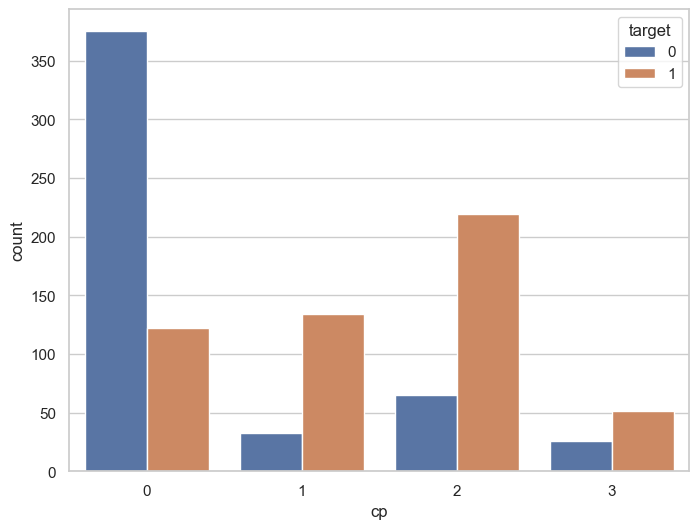

In [47]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.countplot(x="cp", hue="target", data=df)
plt.show()

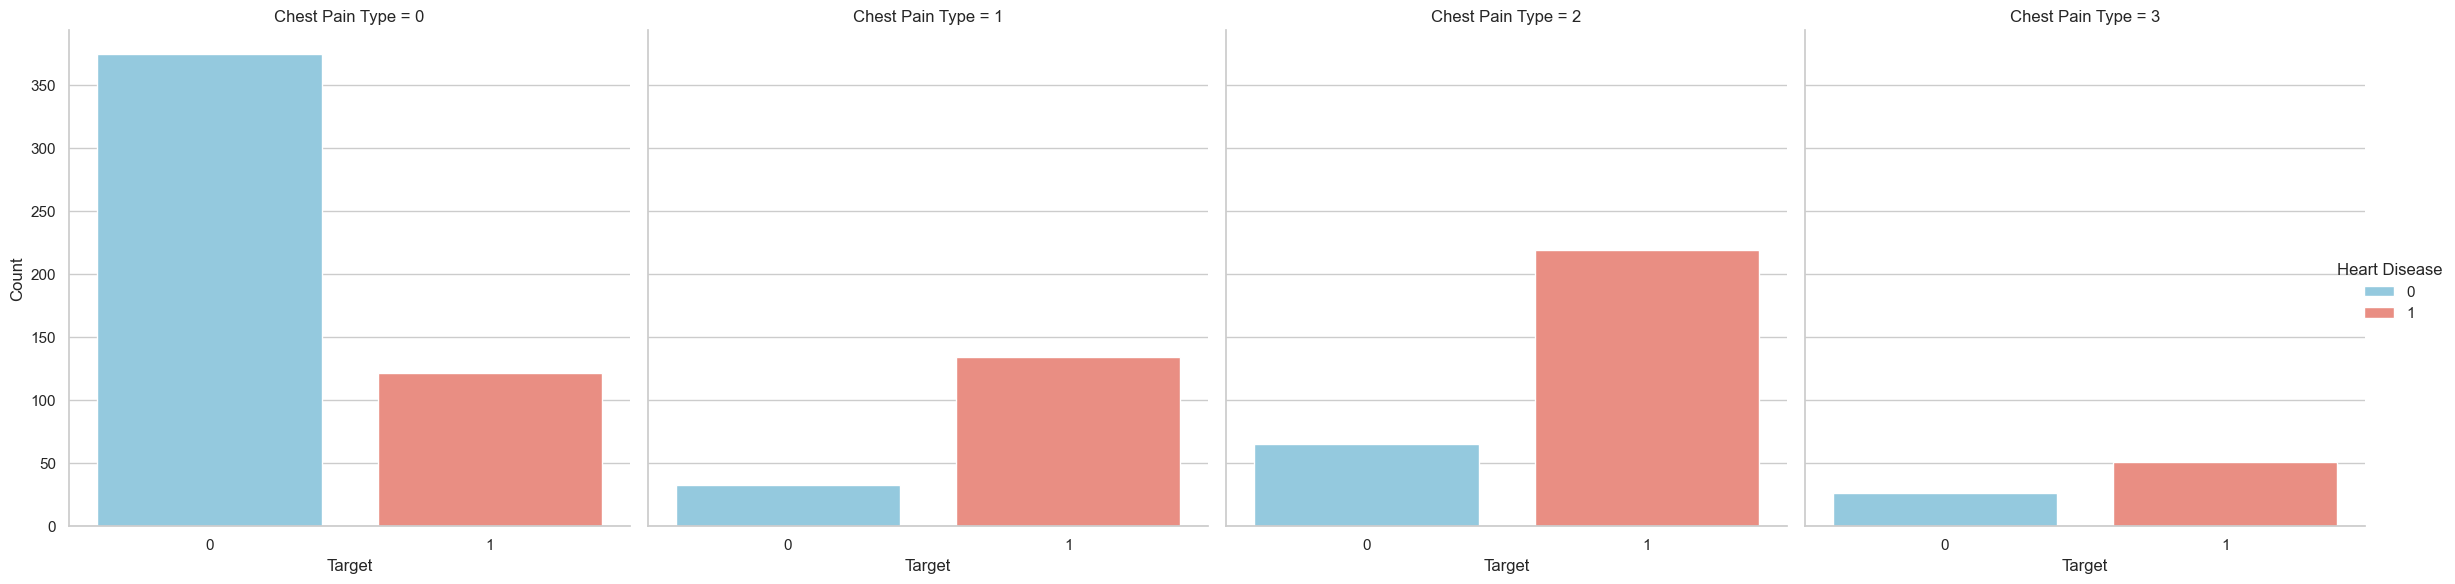

In [51]:
# Convert target to int if needed
df["target"] = df["target"].astype(int)

# Plot with hue and custom color palette
ax = sns.catplot(
    x="target",
    col="cp",
    data=df,
    kind="count",
    hue="target",
    palette={0: "skyblue", 1: "salmon"},
    height=6,
    aspect=1
)

# Titles and labels
ax.set_titles("Chest Pain Type = {col_name}")
ax.set_axis_labels("Target", "Count")
ax._legend.set_title("Heart Disease")

plt.show()

In [52]:
df['thalach'].nunique()

91

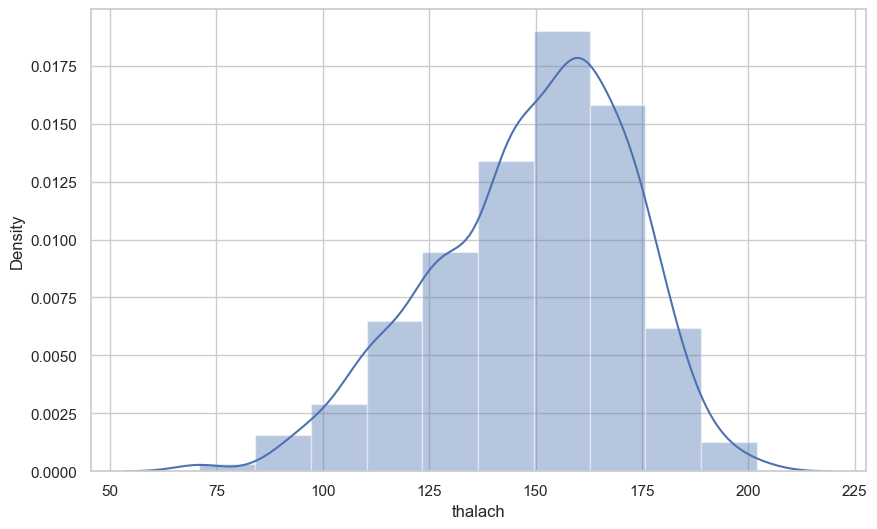

In [53]:
f, ax = plt.subplots(figsize=(10,6))
x = df['thalach']
ax = sns.distplot(x, bins=10)
plt.show()

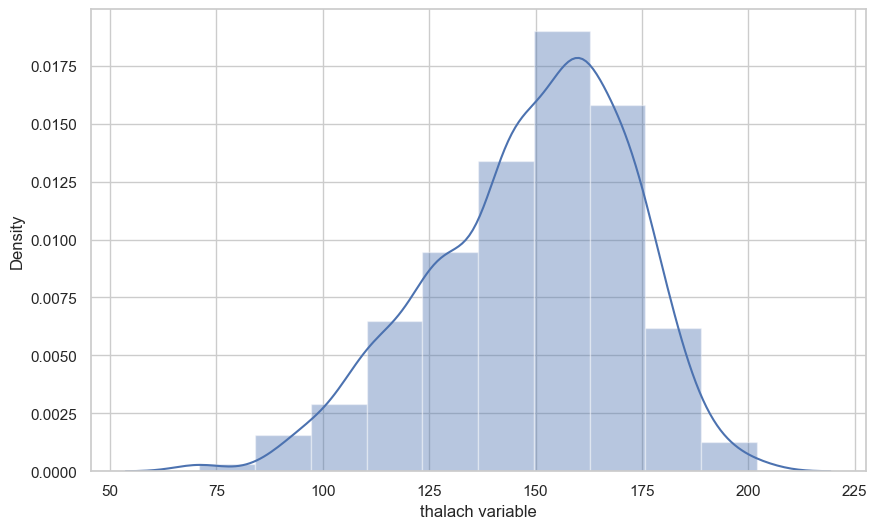

In [54]:
f, ax = plt.subplots(figsize=(10,6))
x = df['thalach']
x = pd.Series(x, name="thalach variable")
ax = sns.distplot(x, bins=10)
plt.show()

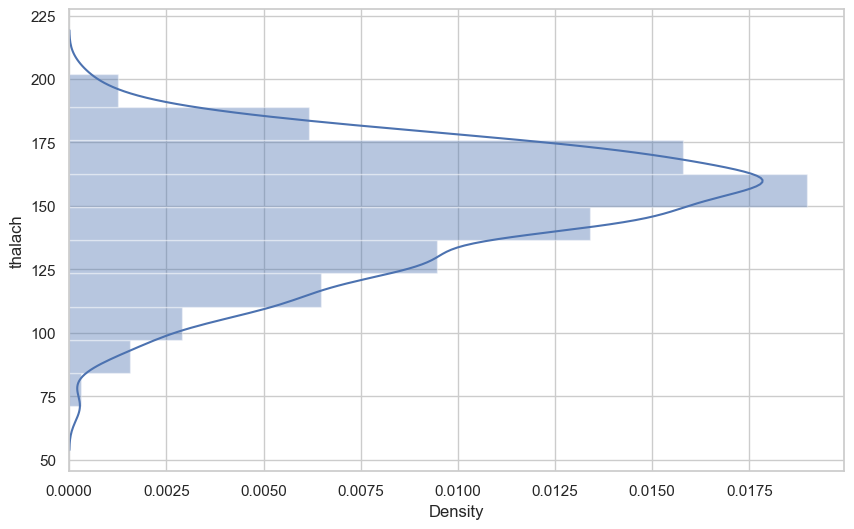

In [55]:
f, ax = plt.subplots(figsize=(10,6))
x = df['thalach']
ax = sns.distplot(x, bins=10, vertical=True)
plt.show()

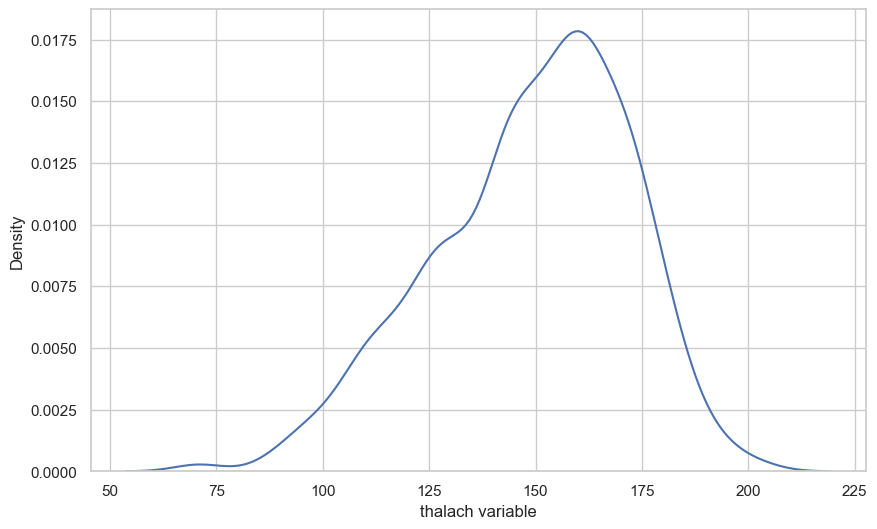

In [57]:
f, ax = plt.subplots(figsize=(10,6))
x = df['thalach']
x = pd.Series(x, name="thalach variable")
ax = sns.kdeplot(x)
plt.show()

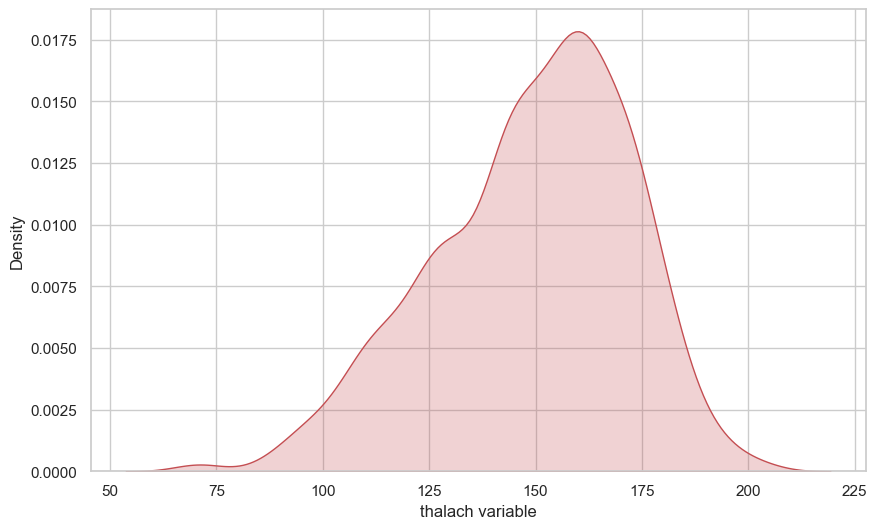

In [58]:
f, ax = plt.subplots(figsize=(10,6))
x = df['thalach']
x = pd.Series(x, name="thalach variable")
ax = sns.kdeplot(x, shade=True, color='r')
plt.show()

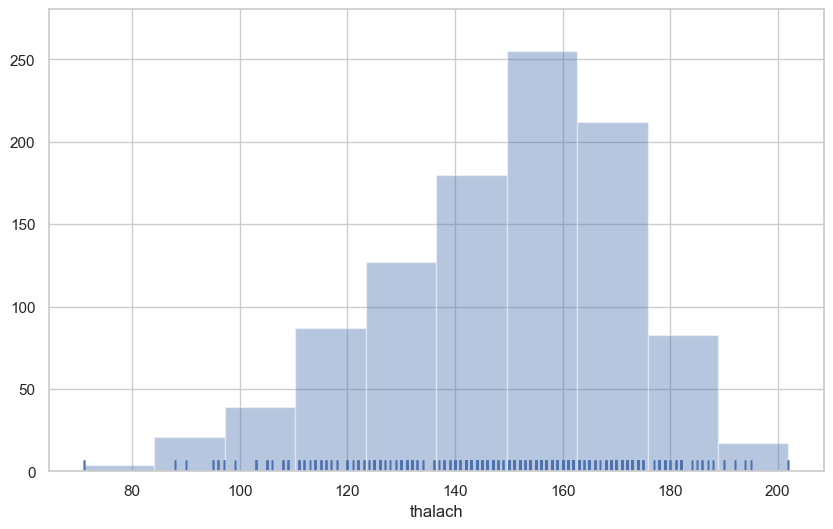

In [59]:
f, ax = plt.subplots(figsize=(10,6))
x = df['thalach']
ax = sns.distplot(x, kde=False, rug=True, bins=10)
plt.show()

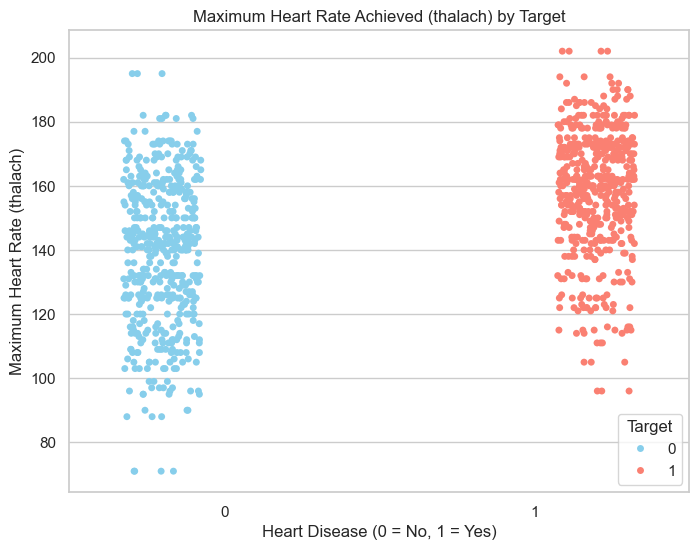

In [62]:
# Convert target to int if not already
df["target"] = df["target"].astype(int)

# Stripplot with hue and jitter
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(
    x="target",
    y="thalach",
    data=df,
    hue="target",
    jitter=0.25,
    palette={0: "skyblue", 1: "salmon"},
    dodge=True
)

# Titles and labels
plt.title("Maximum Heart Rate Achieved (thalach) by Target")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("Maximum Heart Rate (thalach)")
plt.legend(title="Target")

plt.show()

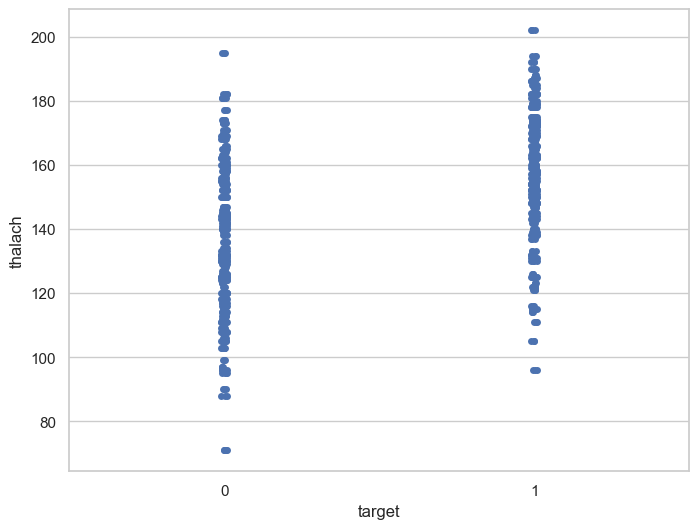

In [65]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="target", y="thalach", data=df, jitter = 0.01)
plt.show()

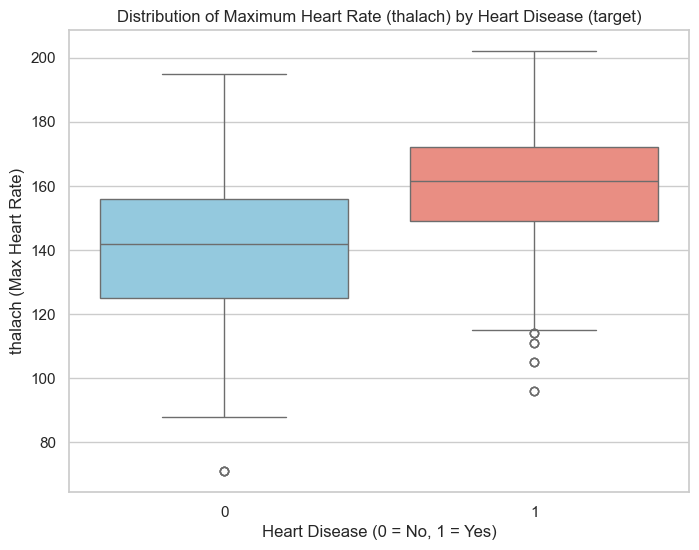

In [69]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(
    x="target",
    y="thalach",
    data=df,
    palette={'0': "skyblue", '1': "salmon"}  # Use string keys
)
plt.title("Distribution of Maximum Heart Rate (thalach) by Heart Disease (target)")
plt.xlabel("Heart Disease (0 = No, 1 = Yes)")
plt.ylabel("thalach (Max Heart Rate)")
plt.show()


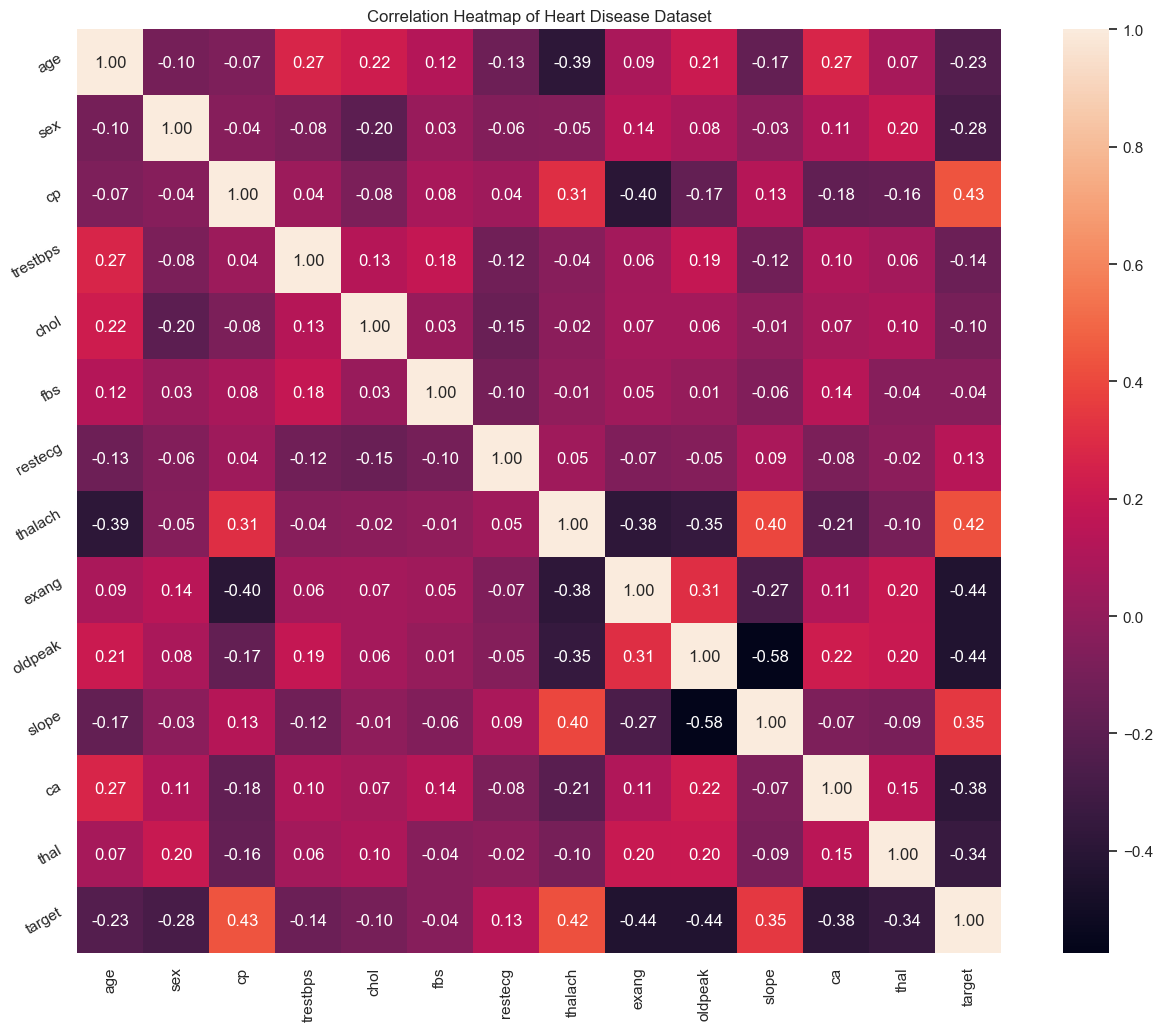

In [70]:
plt.figure(figsize=(16,12))
plt.title('Correlation Heatmap of Heart Disease Dataset')
a = sns.heatmap(correlation, square=True, annot=True, fmt='.2f', linecolor='white')
a.set_xticklabels(a.get_xticklabels(), rotation=90)
a.set_yticklabels(a.get_yticklabels(), rotation=30)           
plt.show()

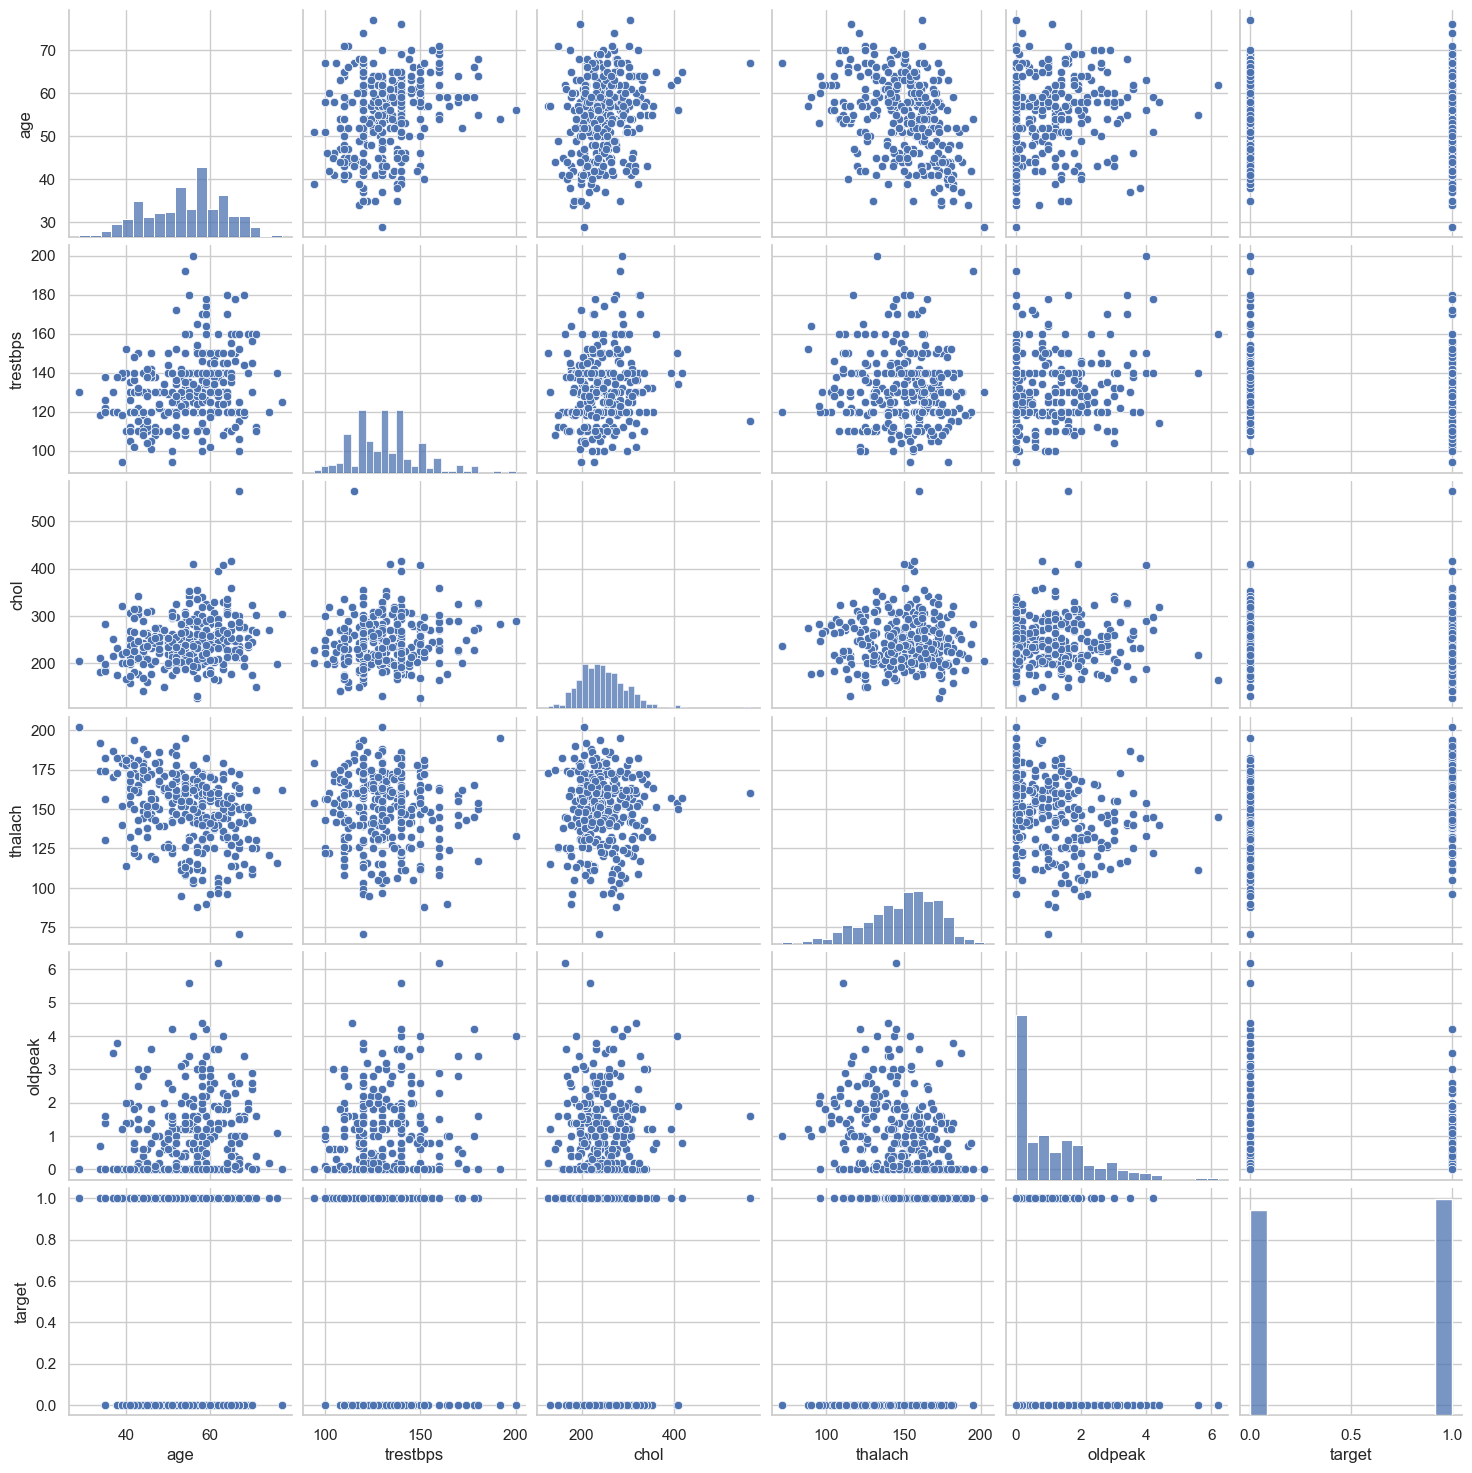

In [72]:
num_var = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target' ]
sns.pairplot(df[num_var], kind='scatter', diag_kind='hist')
plt.show()

In [73]:
df['age'].nunique()

41

In [74]:
df['age'].describe()

count    1025.000000
mean       54.434146
std         9.072290
min        29.000000
25%        48.000000
50%        56.000000
75%        61.000000
max        77.000000
Name: age, dtype: float64

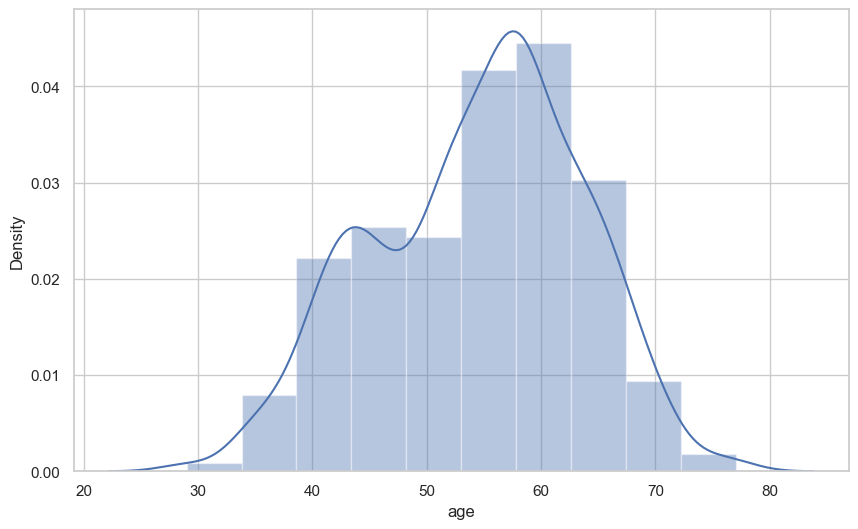

In [75]:
f, ax = plt.subplots(figsize=(10,6))
x = df['age']
ax = sns.distplot(x, bins=10)
plt.show()

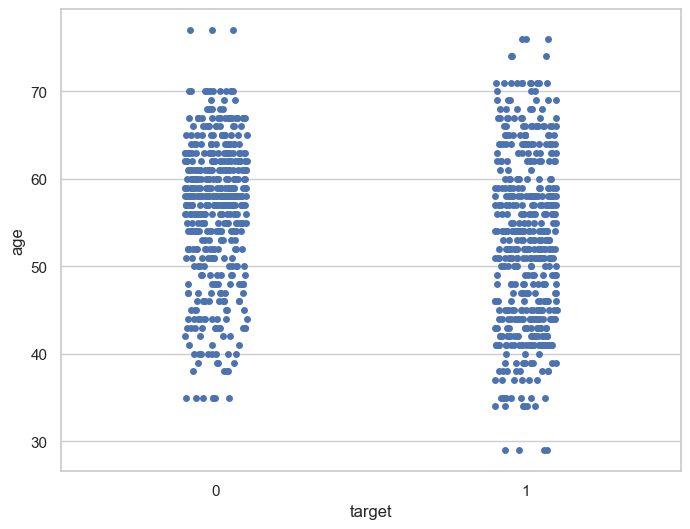

In [76]:
f, ax = plt.subplots(figsize=(8, 6))
sns.stripplot(x="target", y="age", data=df)
plt.show()

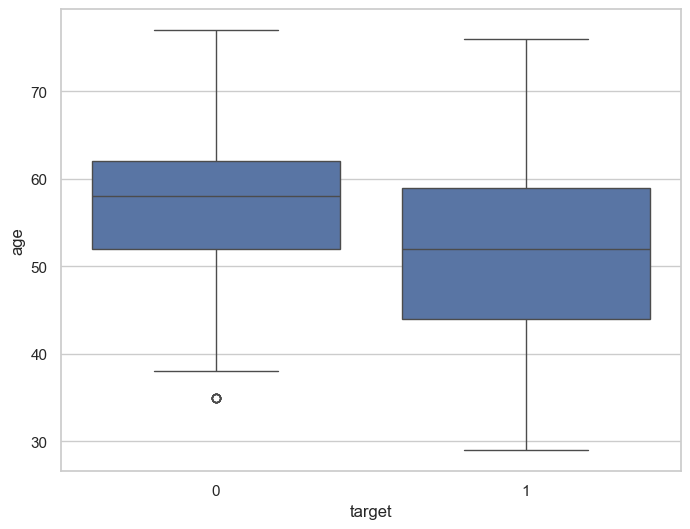

In [77]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x="target", y="age", data=df)
plt.show()

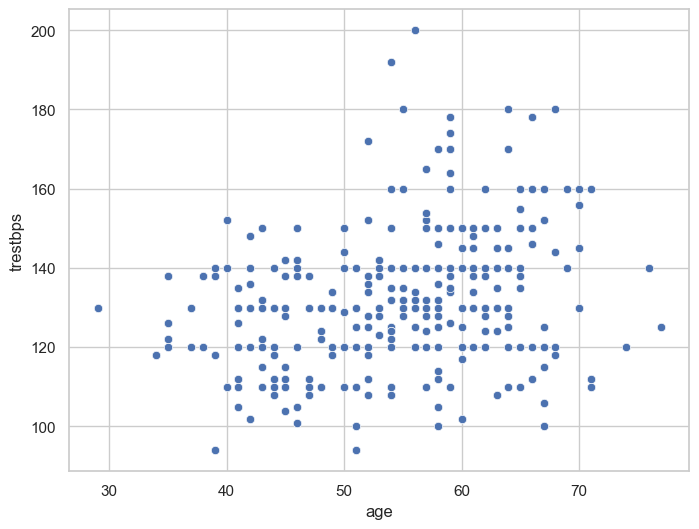

In [78]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.scatterplot(x="age", y="trestbps", data=df)
plt.show()


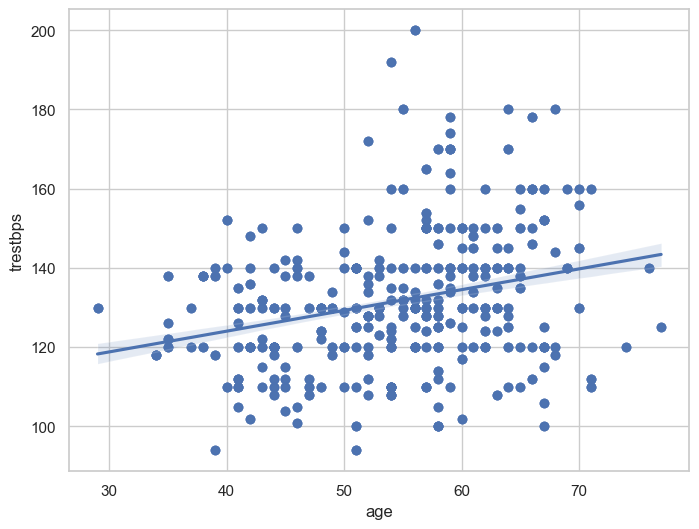

In [79]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="age", y="trestbps", data=df)
plt.show()

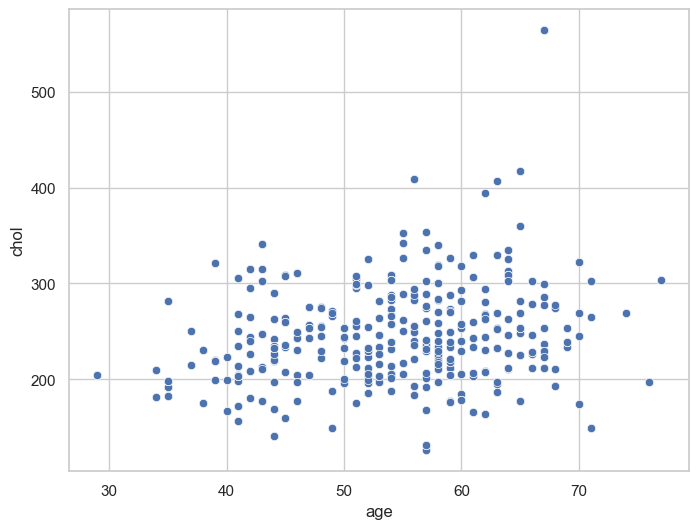

In [80]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.scatterplot(x="age", y="chol", data=df)
plt.show()

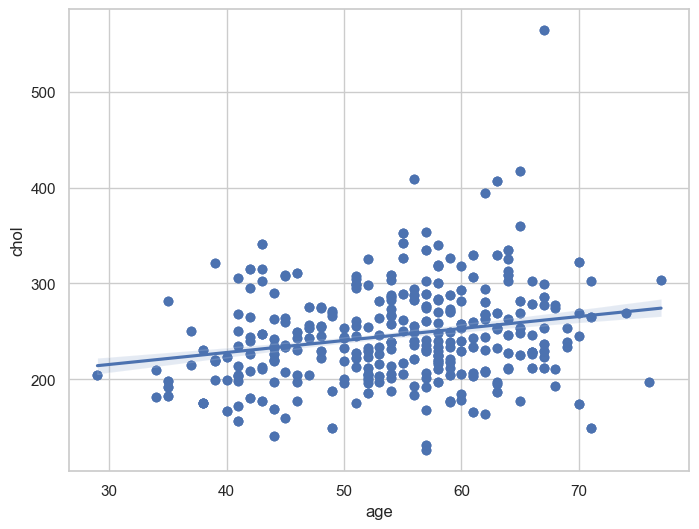

In [81]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="age", y="chol", data=df)
plt.show()

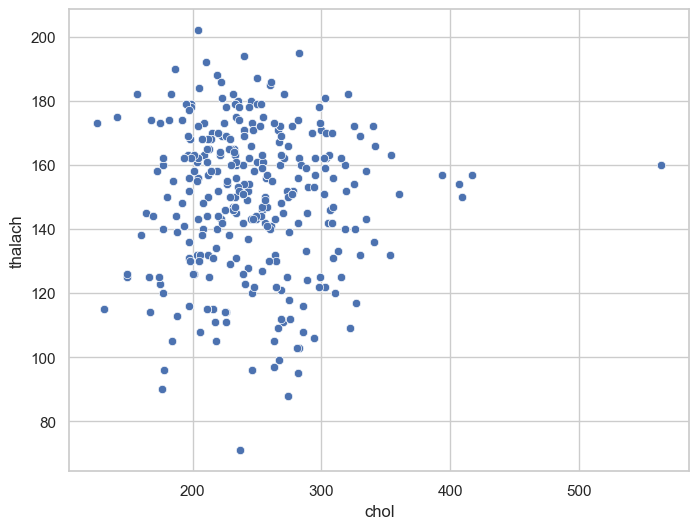

In [82]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.scatterplot(x="chol", y = "thalach", data=df)
plt.show()

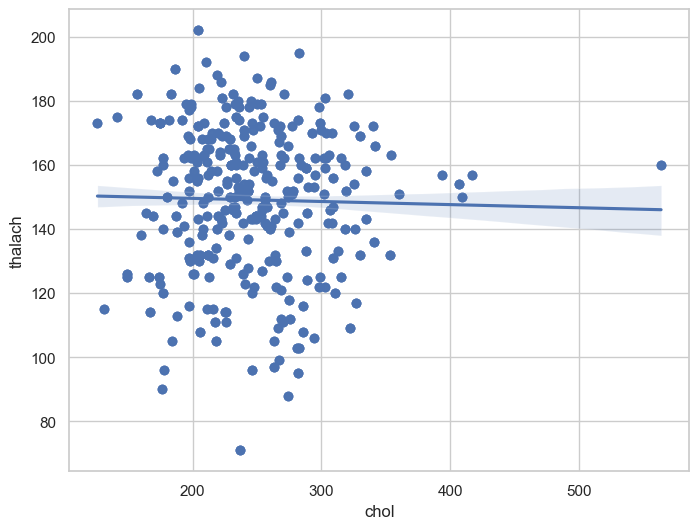

In [83]:
f, ax = plt.subplots(figsize=(8, 6))
ax = sns.regplot(x="chol", y="thalach", data=df)
plt.show()

In [84]:
# check for missing values

df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [85]:
#assert that there are no missing values in the dataframe

assert pd.notnull(df).all().all()


In [86]:
#assert all values are greater than or equal to 0

assert (df >= 0).all().all()


In [87]:
df['age'].describe()

count    1025.000000
mean       54.434146
std         9.072290
min        29.000000
25%        48.000000
50%        56.000000
75%        61.000000
max        77.000000
Name: age, dtype: float64

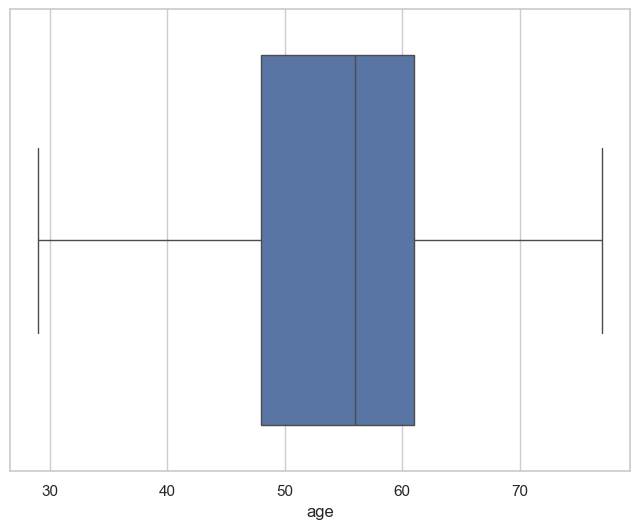

In [88]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["age"])
plt.show()

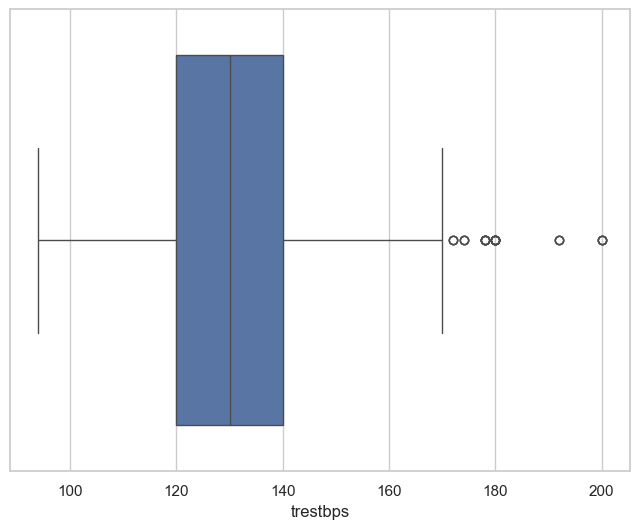

In [89]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["trestbps"])
plt.show()


In [90]:
df['chol'].describe()

count    1025.00000
mean      246.00000
std        51.59251
min       126.00000
25%       211.00000
50%       240.00000
75%       275.00000
max       564.00000
Name: chol, dtype: float64

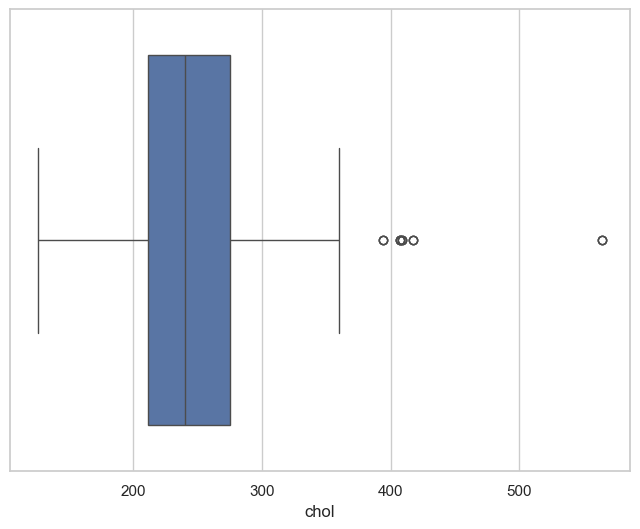

In [91]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["chol"])
plt.show()


In [92]:
df['thalach'].describe()

count    1025.000000
mean      149.114146
std        23.005724
min        71.000000
25%       132.000000
50%       152.000000
75%       166.000000
max       202.000000
Name: thalach, dtype: float64

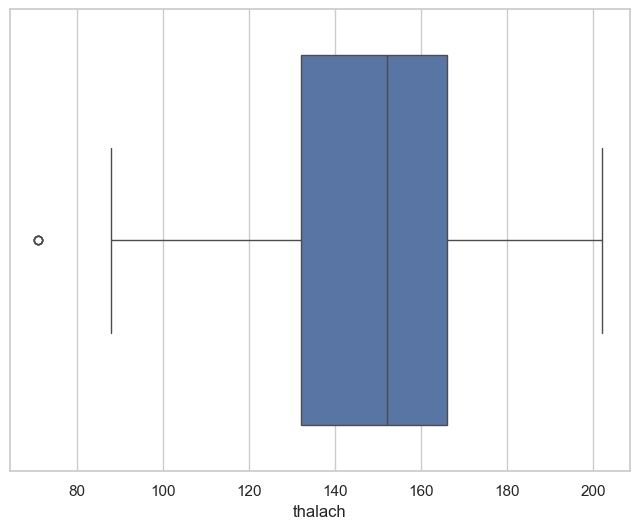

In [93]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["thalach"])
plt.show()

In [94]:
df['oldpeak'].describe()

count    1025.000000
mean        1.071512
std         1.175053
min         0.000000
25%         0.000000
50%         0.800000
75%         1.800000
max         6.200000
Name: oldpeak, dtype: float64

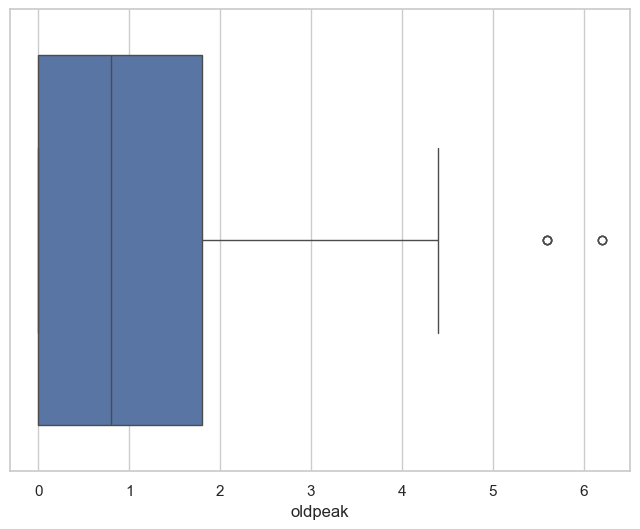

In [95]:
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df["oldpeak"])
plt.show()
